# Skill vs. Luck

Test the situation when:
- a selection process has multiple stages of selection, and 
- the luck score is shuffled at each stage

Which candidates will prevail? Skill or consistent luck?

In [21]:
from skill_vs_luck import (
    total_score,
    select_top_candidates,
    generate_population_scores,
    simulate_selection,
    simulate_selection_for_population)

In [22]:
population = 1000000 # 1 million
luck_weight = 0.05
num_candidates = [10000, 1000, 100, 10] # stages of the selection process

In [23]:
# generate inital population scores
init_skill, init_luck, init_total = generate_population_scores(population=population, luck_weight=luck_weight)
selection = [{"skill_scores": init_skill, "luck_scores": init_luck, "total_scores": init_total}]
selection[0]
rejection = [] # rejected candidates

In [24]:
from tqdm.auto import tqdm
# For each value in num_candidates, simulate the selection process and store the result in the dictionary selection
for i in tqdm(range(1, len(num_candidates))):
    num = num_candidates[i]
    this_round_population = selection[i - 1]
    top_candidates, all_candidates = simulate_selection_for_population(population=this_round_population,
                                                       num_candidates=num,
                                                       luck_weight=luck_weight,
                                                       reset_luck=True)
    selection.append(
       {
            "skill_scores": all_candidates["skill_scores"][top_candidates],
            "luck_scores": all_candidates["luck_scores"][top_candidates],
            "total_scores": all_candidates["total_scores"][top_candidates]
       }
    )

    rejection.append(
         {
               "skill_scores": all_candidates["skill_scores"][~top_candidates],
               "luck_scores": all_candidates["luck_scores"][~top_candidates],
               "total_scores": all_candidates["total_scores"][~top_candidates]
         }
      )

  0%|          | 0/3 [00:00<?, ?it/s]

In [13]:
selection

[{'skill_scores': array([0.6169649 , 0.56378749, 0.51776853, ..., 0.26507521, 0.44462298,
         0.13614257]),
  'luck_scores': array([0.58374839, 0.7762052 , 0.60412257, ..., 0.67078977, 0.68811886,
         0.63120537]),
  'total_scores': array([0.61530407, 0.57440837, 0.52208623, ..., 0.28536094, 0.45679777,
         0.16089571])},
 {'skill_scores': array([1.40709886, 1.37715007, 1.38825044, 1.38463169, 1.39022716,
         1.37858309, 1.37554733, 1.37637488, 1.36268797, 1.36151702,
         1.35189546, 1.34824829, 1.33391992, 1.33085325, 1.34777373,
         1.31966494, 1.33965343, 1.33191873, 1.32475301, 1.34186098,
         1.3253603 , 1.33564648, 1.31736621, 1.3083123 , 1.30564327,
         1.31729418, 1.3067731 , 1.2938136 , 1.29365538, 1.28357934,
         1.3110314 , 1.31672193, 1.29483333, 1.30012534, 1.28516088,
         1.30935535, 1.3006174 , 1.30845693, 1.29258786, 1.29105522,
         1.31687439, 1.29651833, 1.286665  , 1.28798939, 1.27879923,
         1.29220164, 1.2

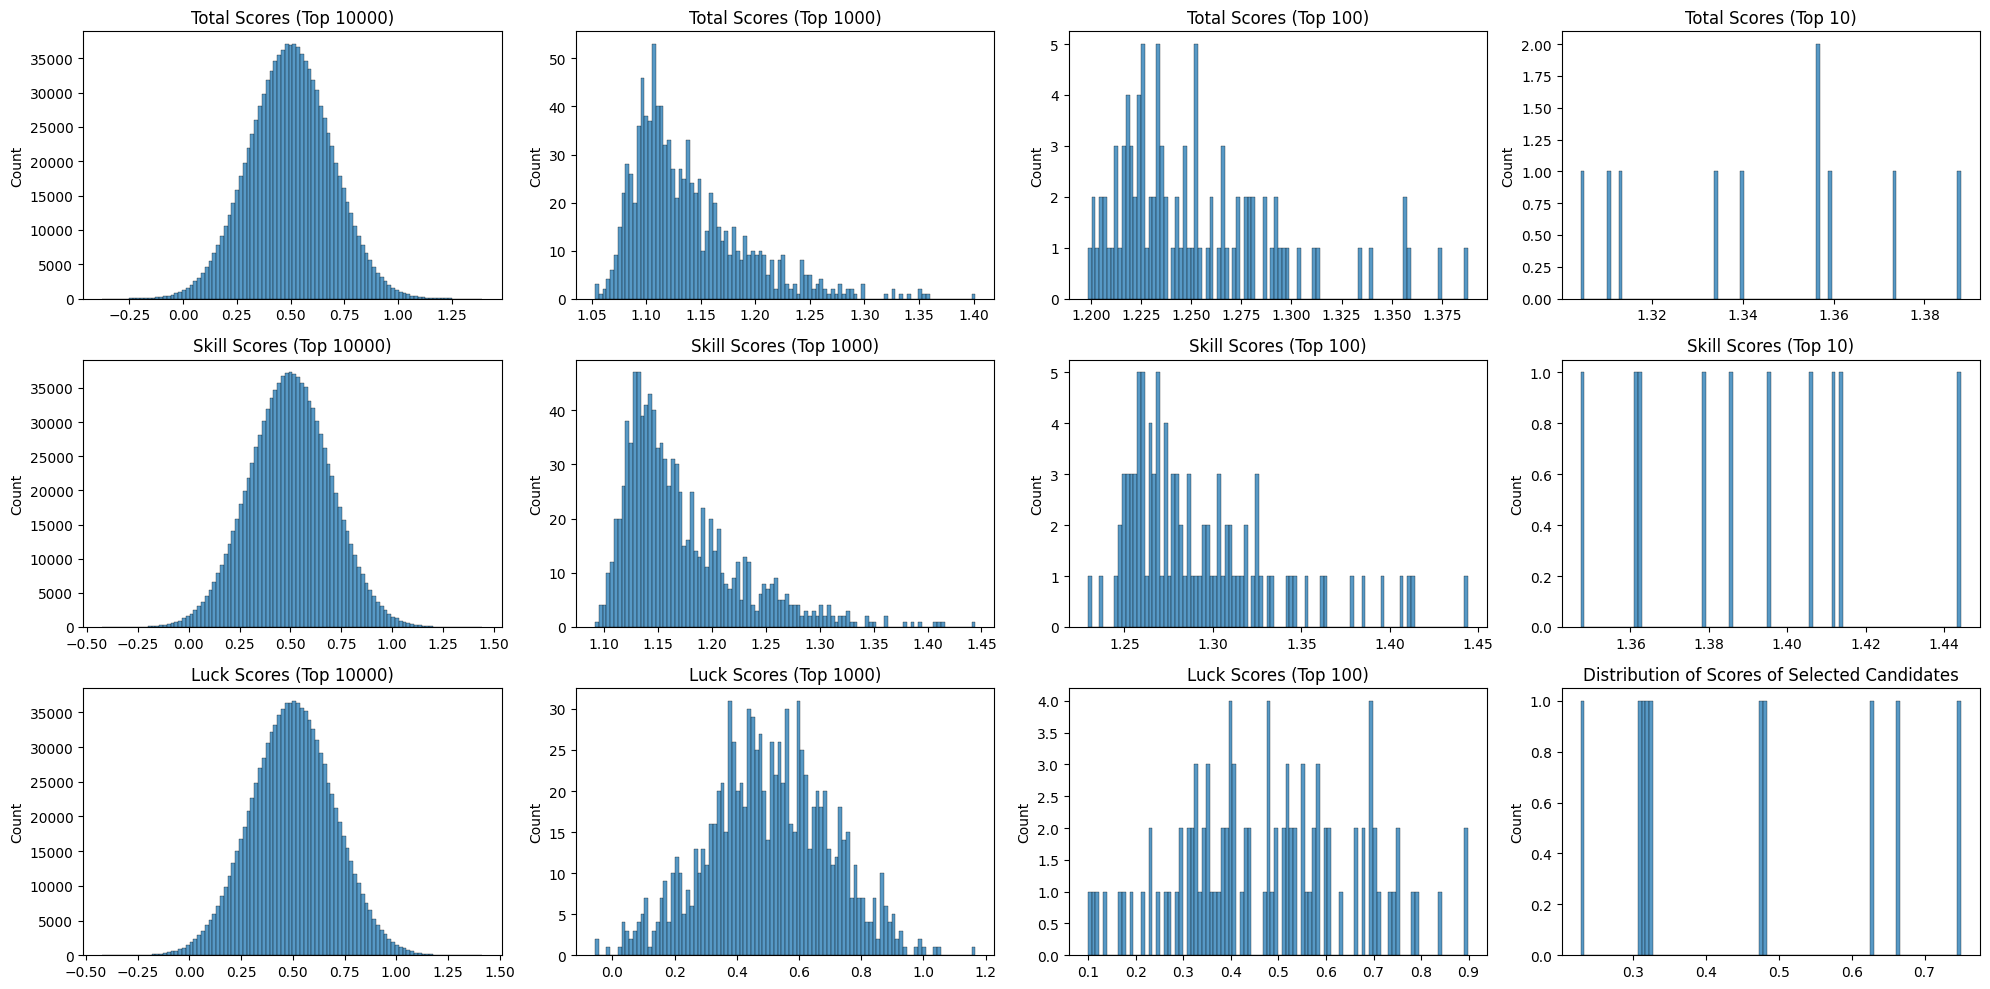

In [25]:
# for each element in selection, plot the distribution of total scores, skill scores, and luck scores
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, len(selection), figsize=(20, 10))
for i in range(len(selection)):
    sns.histplot(selection[i]["total_scores"], bins=100, ax=axs[0, i])
    axs[0, i].set_title(f"Total Scores (Top {num_candidates[i]})")
    sns.histplot(selection[i]["skill_scores"], bins=100, ax=axs[1, i])
    axs[1, i].set_title(f"Skill Scores (Top {num_candidates[i]})")
    sns.histplot(selection[i]["luck_scores"], bins=100, ax=axs[2, i])
    axs[2, i].set_title(f"Luck Scores (Top {num_candidates[i]})")

plt.title("Distribution of Scores of Selected Candidates")
plt.tight_layout()
plt.show()

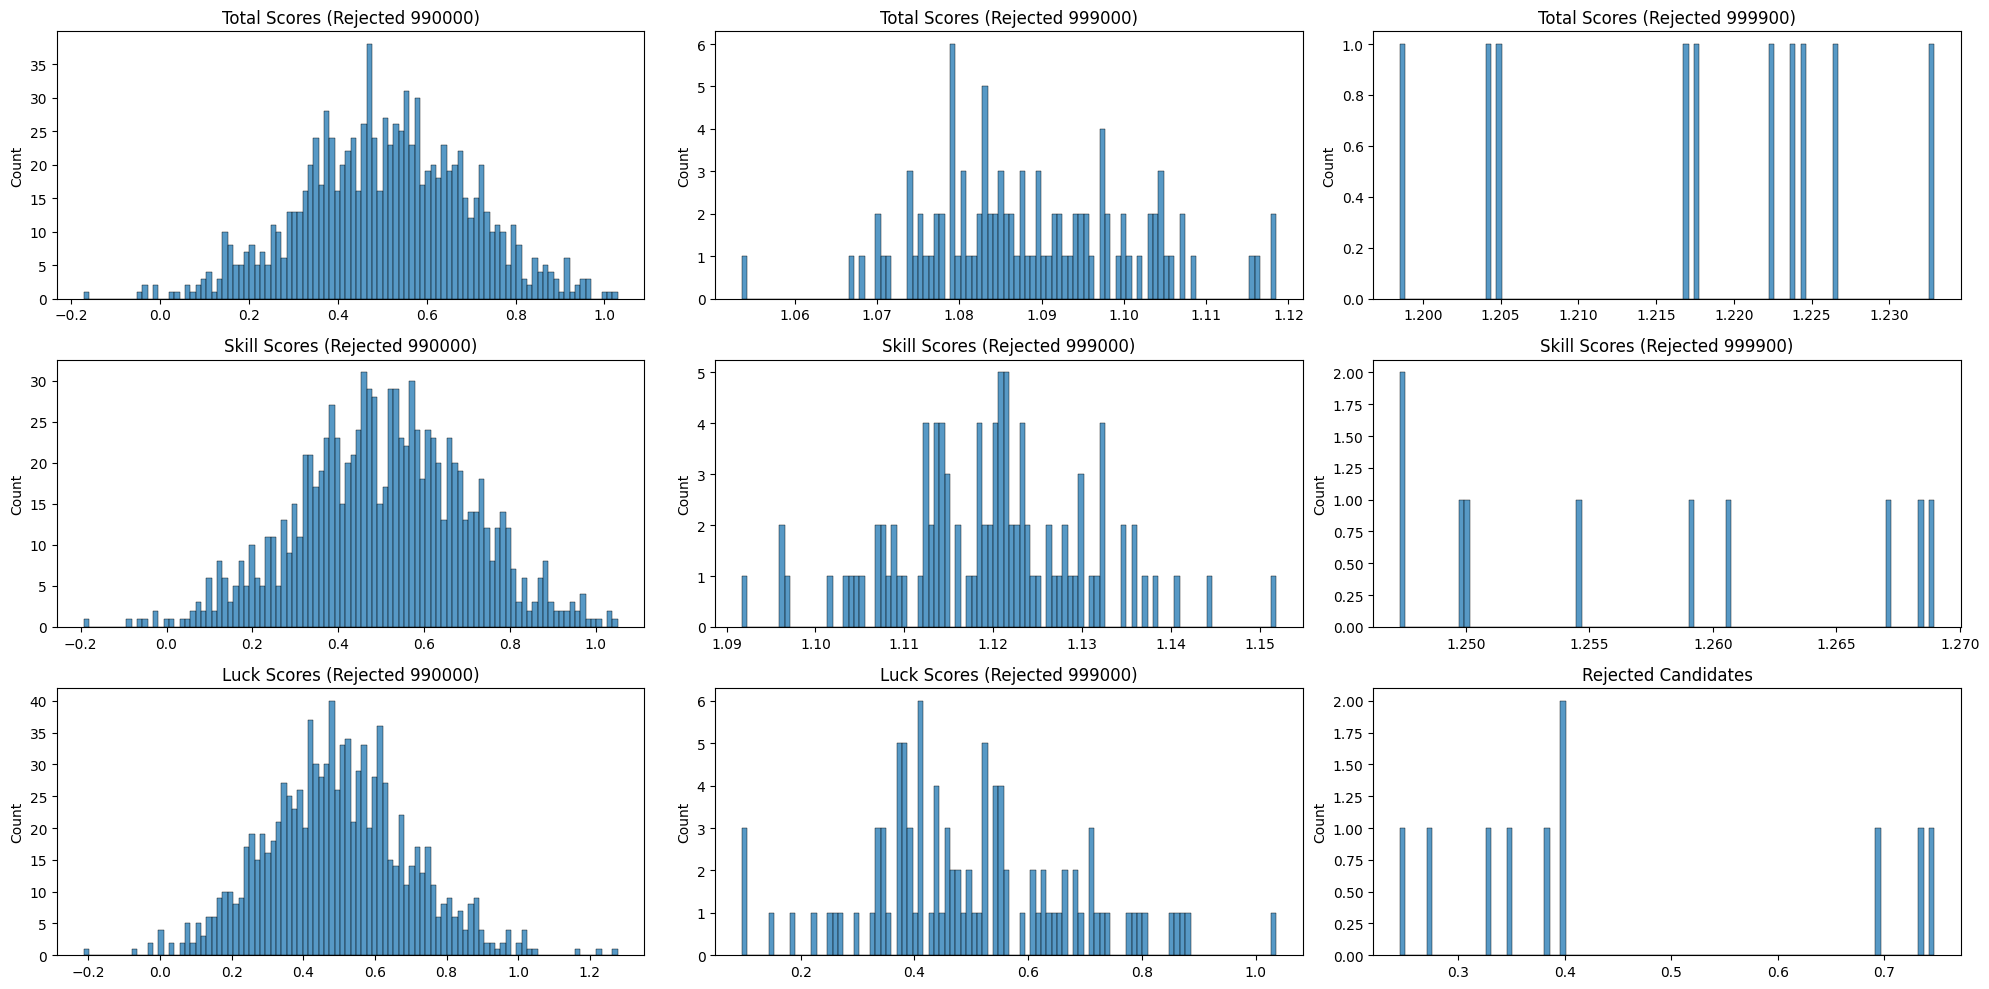

In [26]:
# for each element in rejection, plot the distribution of total scores, skill scores, and luck scores
fig, axs = plt.subplots(3, len(rejection), figsize=(20, 10))
for i in range(len(rejection)):
    sns.histplot(rejection[i]["total_scores"], bins=100, ax=axs[0, i])
    axs[0, i].set_title(f"Total Scores (Rejected {population - num_candidates[i]})")
    sns.histplot(rejection[i]["skill_scores"], bins=100, ax=axs[1, i])
    axs[1, i].set_title(f"Skill Scores (Rejected {population - num_candidates[i]})")
    sns.histplot(rejection[i]["luck_scores"], bins=100, ax=axs[2, i])
    axs[2, i].set_title(f"Luck Scores (Rejected {population - num_candidates[i]})")

plt.title("Rejected Candidates")
plt.tight_layout()
plt.show()